In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import seaborn as sns
%matplotlib inline

 I WATCHED THE SAVED LECTURE AND THE FOLLOW-UP LECTURE ON THIS TASK AND THE LECTURER WAS NOT ABLE TO DOWNLOAD AND WORK WITH THE MNIST DATA BECAUSE IT REQUIRED RESHAPING AND THERE WAS NO CLEAR SOLUTION. I ALSO LOOKED AT SOME OF THE SUPPLEMENTARY LECTURES BUT THEY WERE DATED BEFORE THIS SUBJECT AND WERE NOT CLEARLY LABELED. I TRIED TO WATCH A SUPPLEMENTARY LECTURE TO SEE IF IT COVERED THIS TOPIC BUT THE AUDIO QUALITY WAS SO BAD IT WAS INAUDIBLE.

 I SPENT 2-DAYS TRYING TO SOLVE THIS PROBLEM BY TRYING TO USE GOOGLE COLAB AND TENSORFLOW AND KERAS.
 
 KERAS HAS AN INBUILT FEATURE TO READ MNIST.

 THERE WERE MANY PROBLEMS IMPORTING AND USING TENSORFLOW AND KERAS. EVEN GOOGLE COLAB DOES NOT HAVE ALL PACKAGES PRE-INSTALLED, SOME TENSORFLOW PACKAGE REQUIRED !pip install.

 IT WAS NOT POSSIBLE TO INSTALL TENSORFLOW INTO ANACONDA, AFTER MANY HOURS AND DIFFERENT ATTEMPTS TO INSTALL. KERAS WAS DOWNLOADED TO ANACONDA, BUT IT DID NOT APPEAR IN THE ANACONDA PACKAGE LIST.

 I LEARNED TO USE TENSORFLOW AND TO RESHAPE THE ARRAY FOR A BASIC MACHINE LEARNING TENSORFLOW MODEL BUT WHEN THE TENSORFLOW VERSION OF 'RANDOM FOREST CLASSIFIER' WAS USED THE MODEL BROKE BECAUSE THE ARRAY WAS MIS-SHAPED. VERY DISAPPOINTING.

 THIS WEBSITE SAID THAT MNIST WAS VERY HARD TO WORK WITH FOR BEGINNERS AND IT WAS BETTER TO USE A csv : https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

 I DID NOT HAVE ACCESS TO THE HYPERIONDEV DISCORD CHANNEL SO I DO NOT KNOW IF SOMEONE FOUND A DIFFERENT WORKAROUND.

 THIS TASK IS DONE WITH A csv FILE OF THE TEST DATASET ONLY.

 THE CSV FILE CAME FROM :
 https://pjreddie.com/projects/mnist-in-csv/

 THIS csv FILE WILL BE PLACED INTO A FOLDER TOGETHER WITH THIS NOTEBOOK AND UPLOADED TO DROPBOX.

## CAPSTONE VI

## TASK INSTRUCTIONS: 

## ● Load the MNIST dataset.

In [211]:
# Reading final files that was made in previous MNIST Convert.ipynb notebook
data = pd.read_csv('mnist_test.csv')

In [212]:
data.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


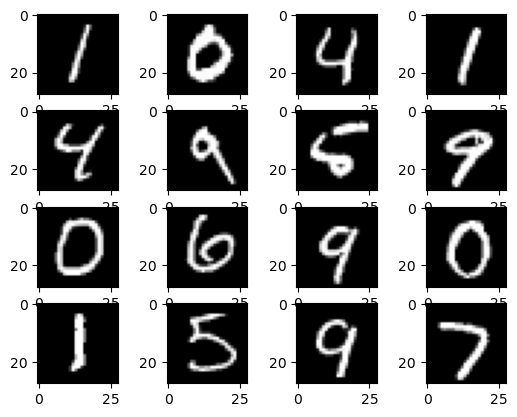

In [214]:
## CODE FROM :
## https://www.kaggle.com/code/atorin/mnist-digit-recognition-with-random-forests

def plotNum(ind):
    plt.imshow(np.reshape(np.array(data.iloc[ind,1:]), (28, 28)), cmap="gray")

plt.figure()
for ii in range(1,17):
    plt.subplot(4,4,ii)
    plotNum(ii)

## TASK INSTRUCTIONS: 

## ● Split the data into a training, development, and test set.

In [215]:
## CODE FROM :
## https://github.com/Aakriti5/Random-Forest-Classifier/blob/master/Image%20_classification_project.ipynb

# extracting data from the dataset
a = data.iloc[3,1:].values
#reshaping the extracted data into a reasonable size
a = a.reshape(28,28).astype('uint8')

In [216]:
# selecting all rows and the second column onwards for x (data)
# selecting all rows and the first column for y (index)
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [217]:
#creating test and train sizes/batches
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state=42)

In [218]:
#check data
x_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
9253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1670,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TASK INSTRUCTIONS: 

## ○ Add a comment explaining the purpose of the train, development and test sets.

  THE TRAINING SET IS FOR MODELING, THE DEVELOPMENT SET IS FOR IMPROVING THE MODEL FIT AND THE TEST SET IS FOR VALIDATION PURPOSES.

  THE TEST SET IS KEPT BACK FROM THE TRAINING SET SO THAT WE CAN CHECK THE DEGREE THAT THE MODEL WORKS BY CORRECTLY MAKING PREDICTIONS.

  THE DEVELOPMENT SET HAS A FUNCTION IN JUDGING THE PREDICTIONS TO MAKE ADJUSTMENTS TO THE PARAMETERS TO AVOID OVERFITTING WHICH MAKES A VERY ACCURATE MODEL THAT IS UNABLE TO WORK OUTSIDE OF THE DATASET.

VIZ: https://towardsdatascience.com/how-to-split-a-tensorflow-dataset-into-train-validation-and-test-sets-526c8dd29438

In [219]:
# CODE TO SPLIT TRAINING SET INTO A TRAINING + DEVELOPMENT SET
# CODE FROM : 
# https://stackoverflow.com/questions/3674409/how-to-split-partition-a-dataset-into-training-and-test-datasets-for-e-g-cros

x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [220]:
print('THIS IS THE DATASET OF IMAGES :- ')
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))
print('''
THIS IS THE DEVELOPMENT SET\n''')
print('X_Dev:  '  + str(x_dev.shape))
print('Y_Dev: ' + str(y_dev.shape))

THIS IS THE DATASET OF IMAGES :- 
X_train: (7999, 784)
Y_train: (7999,)
X_test:  (1000, 784)
Y_test:  (1000,)

THIS IS THE DEVELOPMENT SET

X_Dev:  (1000, 784)
Y_Dev: (1000,)


    THE DEVELOPMENT SET  SHOULD BE A 50/50 SPLIT OF THE PREVIOUS TRAINING SET.
    THERE ARE 10,000 IMAGES, THE TRAINING/TESTING SET WAS SPLIT 80/20.
    NOW THE TESTING SET IS SPLIT 50/50 SO 1,000 IMAGES IN THE TESTING SET AND 1,000 IN THE DEVELOPMENT SET.
    THE ABOVE PRINT-OUT LOOKS OKAY, BUT I DON'T REALLY UNDERSTAND IT, SO IT MIGHT BE A WARNING FLAG.

## TASK INSTRUCTIONS:

## ● Use the RandomForestClassifier built into SKLearn.

In [221]:
### Importance scores
#A property of the Random Forest ensemble method in sklearn is that they let you print importance scores for features in the dataset. 

forest = RandomForestClassifier(n_estimators=200, max_depth=20)
forest.fit(x_train, y_train)

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

350    0.010286
290    0.009826
378    0.009021
409    0.008498
377    0.007780
         ...   
308    0.000000
336    0.000000
337    0.000000
338    0.000000
783    0.000000
Length: 784, dtype: float64

In [222]:
# prediction on test set
y_pred = forest.predict(x_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.949


In [223]:
# https://www.freecodecamp.org/news/how-to-use-the-tree-based-algorithm-for-machine-learning/
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(df_x.columns), "importance": forest.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
350,0.297,0.010286
290,0.252,0.009826
378,0.321,0.009021
409,249,0.008498
377,0.320,0.007780
...,...,...
308,0.259,0.000000
336,0.283,0.000000
337,0.284,0.000000
338,0.285,0.000000


## TASK INSTRUCTIONS:

## ● Pick one parameter to tune, and explain why you chose this parameter.

    I only used 2-parameters for the Random Forest Classifier, these are; n_estimators and max_depth.

    I will will pick n_estimators because the n_estimator parameter controls the number of trees inside the classifier.

## TASK INSTRUCTIONS:

## ● Choose which value for the parameter to set for testing on the test data and explain why.

    I will choose a value of 100 for n_estimators because it is half the value of the original and I anticipate something would change in the output score.

In [224]:
forest_v2 = RandomForestClassifier(n_estimators=100, max_depth=20)
forest_v2.fit(x_train, y_train)

RandomForestClassifier(max_depth=20)

In [225]:
# prediction on test set
y_pred_v2 = forest_v2.predict(x_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred_v2))

Accuracy: 0.942


    By changing the original value of n_estimators from 200 to 100, the accuracy score has fallen by 0.1%.
    From an accuracy score of 95.6% to 95.5%.

## TASK INSTRUCTIONS:

## ● Print the confusion matrix for your Random Forest model on the test set.

In [226]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 88   0   0   0   0   2   0   0   0   0]
 [  0 110   1   0   0   0   0   0   1   0]
 [  1   0  89   1   1   0   2   1   2   0]
 [  1   0   3  95   0   2   0   2   0   0]
 [  0   0   1   0 104   0   1   0   0   1]
 [  1   3   1   1   0  94   1   0   0   0]
 [  1   2   0   0   0   0  98   0   0   0]
 [  0   0   3   0   0   0   0  87   1   1]
 [  0   0   0   4   1   0   0   0  88   0]
 [  0   1   1   0   4   0   0   2   0  96]]


Text(0.5, 1.0, 'Confusion Matrix')

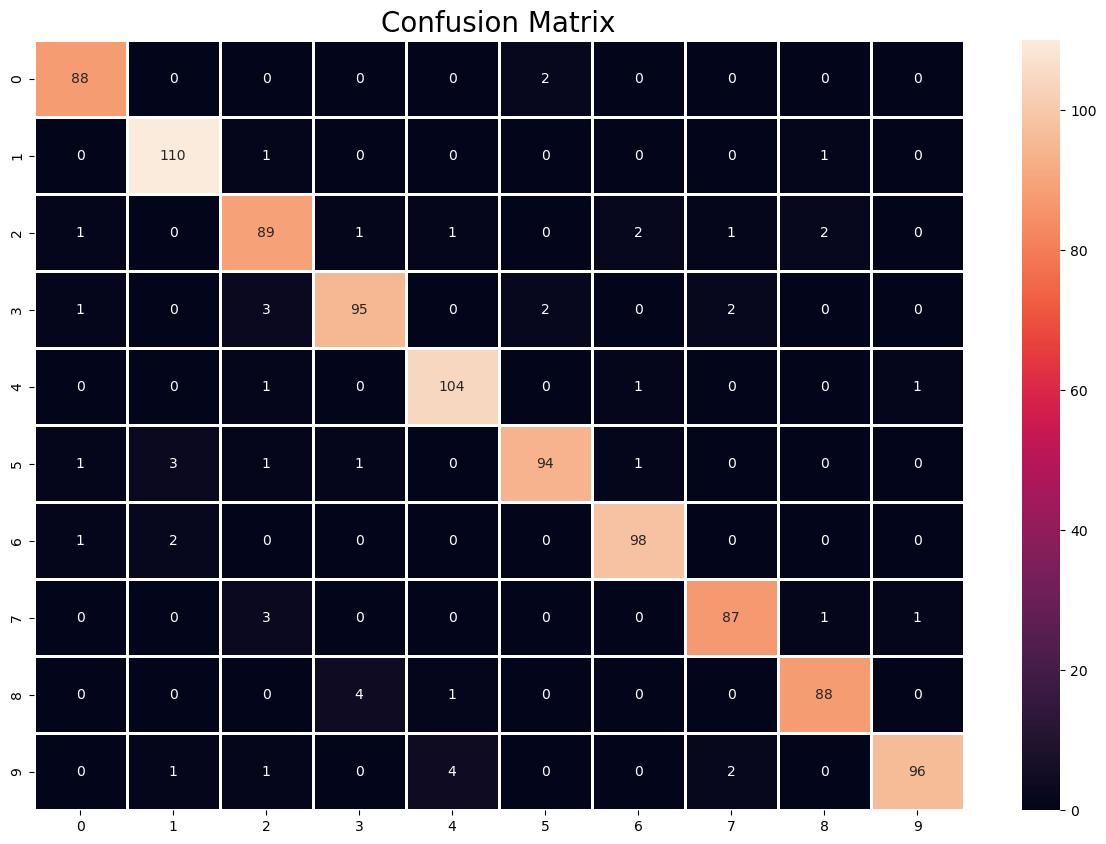

In [227]:
# CODE FROM : ???
cf_matrix = confusion_matrix
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')
plt.title('Confusion Matrix', fontsize=20)

## TASK INSTRUCTIONS:

## ● Report which classes the model struggles with the most.

    It looks like this model struggles with the digit '1' the most because it shows the highest number => 111.

## TASK INSTRUCTIONS:

## ● Report the accuracy, precision, recall, and f1-score.

In [228]:
# CODE FROM :
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

# from sklearn.metrics import precision_score 
print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))
## this required the 'average=' parameter to work, it is quite complicated/nuanced
## https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

Precision: 0.949


In [229]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
## this required the 'average=' parameter to work, it is quite complicated/nuanced
## https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

Accuracy: 0.949


In [230]:
from sklearn.metrics import recall_score
print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))
## this required the 'average=' parameter to work, it is quite complicated/nuanced
## https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

Recall: 0.949


In [231]:
## CODE FROM :
## https://www.educative.io/answers/what-is-the-f1score-function-in-sklearn
from sklearn.metrics import f1_score
score = f1_score(y_test, y_pred, average="micro")
print("Micro F1-Score: ", score)

Micro F1-Score:  0.949


    The scores are:-

    accuracy    = 95.0 %
    precision   = 95.0 %
    recall      = 95.0 %
    f1-score    = 95.00000000000001 %